In [14]:
!pip install webdrivermanager
!pip install bs4
!pip install requests

In [15]:
import os
import time
from datetime import date
import csv
from bs4 import BeautifulSoup
from selenium import webdriver
from webdrivermanager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options


In [17]:
class AmazonProductScraper:
    def __init__(self):
        self.driver = None

    def open_browser(self):
        
        opt = Options()

        opt.add_argument("--disable-infobars")
        opt.add_argument("--disable-extensions")
        opt.add_argument('--log-level=OFF')
        opt.add_experimental_option('excludeSwitches', ['enable-logging'])

        url = "https://www.amazon.in/"
        self.driver = webdriver.Chrome(r"E:\chromedriver.exe")
        
        self.driver.get(url)
        print("\n>> The browser is open")

       
        time.sleep(3)

    def get_product_url(self):

        search_product_name = input(">> Enter the product to be searched: ").replace(" ", "+")

       
        product_url = "https://www.amazon.in/s?k={}&ref=nb_sb_noss"

        product_url = product_url.format(search_product_name)

        print(">> Product URL: ", product_url)

        
        self.driver.get(product_url)
        
        return [product_url, search_product_name, search_product_name]

    def extract_webpage_information(self):
       
        soup = BeautifulSoup(self.driver.page_source, 'html.parser')
        
        search_results = soup.find_all('div', {'data-component-type': 's-search-result'})

        return search_results

    @staticmethod
    def extract_product_information(search_results):
        temporary_record = []
        for i in range(len(search_results)):
            item = search_results[i]

            
            atag_item = item.h2.a

           
            description = atag_item.text.strip()

            
            product_url = "https://www.amazon.in/" + atag_item.get('href')
            
            try:
                product_review = item.i.text.strip()
            except AttributeError:
                product_review = "N/A"
            try:
                review_number = item.find('span', {'class': 'a-size-base'}).text
            except AttributeError:
                review_number = "N/A"    
            product_information = (product_review, review_number, product_url)

            
            temporary_record.append(product_information)
    
        return temporary_record

    def navigate_to_other_pages(self, product_details):
        
        records = []

        product_url = product_details[0]
        search_product_name = product_url[1]

        print("\n>> Page 1 - webpage information extracted")

        max_number_of_pages = "(//li[@class='a-disabled'])[3]"

        number_of_pages = self.driver.find_element_by_xpath(max_number_of_pages)

        for i in range(2, int(number_of_pages.text)+1):
            
            next_page_url = product_url+ "&page=" + str(i)
            self.driver.get(next_page_url)

            
            search_results = self.extract_webpage_information()
            temporary_record = self.extract_product_information(search_results)

            extraction_information = ">> Page {} - webpage information extracted"
            print(extraction_information.format(i))

            for j in temporary_record:
                records.append(j)

        self.driver.close()

        return records

    @staticmethod
    def product_information_spreadsheet(records, product_details):

        today = date.today().strftime("%d-%m-%Y")

        for _ in records:

            searched_product = product_details[-1]

            file_name = "{}_{}.csv".format(searched_product, today)
            f = open(file_name, "w", newline='', encoding='utf-8')
            writer = csv.writer(f)
            writer.writerow(['Rating', 'Review Count', 'Product URL'])
            writer.writerows(records)
            f.close()

        message = ("\n>> Information about the product '{}' is stored in {}").format(searched_product, file_name)

        print(message)

        os.startfile(file_name)    

In [19]:

if __name__ == "__main__":

    my_amazon_bot = AmazonProductScraper()

    my_amazon_bot.open_browser()

    product_details = my_amazon_bot.get_product_url()

    my_amazon_bot.extract_product_information(my_amazon_bot.extract_webpage_information())

    navigation = my_amazon_bot.navigate_to_other_pages(product_details)

    my_amazon_bot.product_information_spreadsheet(navigation, product_details)


>> The browser is open
>> Enter the product to be searched: laptop
>> Product URL:  https://www.amazon.in/s?k=laptop&ref=nb_sb_noss

>> Page 1 - webpage information extracted
>> Page 2 - webpage information extracted
>> Page 3 - webpage information extracted
>> Page 4 - webpage information extracted
>> Page 5 - webpage information extracted
>> Page 6 - webpage information extracted
>> Page 7 - webpage information extracted
>> Page 8 - webpage information extracted
>> Page 9 - webpage information extracted
>> Page 10 - webpage information extracted
>> Page 11 - webpage information extracted
>> Page 12 - webpage information extracted
>> Page 13 - webpage information extracted
>> Page 14 - webpage information extracted
>> Page 15 - webpage information extracted
>> Page 16 - webpage information extracted
>> Page 17 - webpage information extracted
>> Page 18 - webpage information extracted
>> Page 19 - webpage information extracted
>> Page 20 - webpage information extracted

>> Information

In [20]:
import pandas as pd
import numpy as np

In [21]:
df=pd.read_csv('laptop_24-06-2021.csv')

In [22]:
df.head()

,Rating,Review Count,Product URL
0,3.3 out of 5 stars,2,https://www.amazon.in//gp/slredirect/picassoRe...
1,NaN,NaN,https://www.amazon.in//gp/slredirect/picassoRe...
2,3.8 out of 5 stars,186,https://www.amazon.in//ASUS-VivoBook-i3-1005G1...
3,4.1 out of 5 stars,871,https://www.amazon.in//HP-Laptop-15-6-inch-Win...
4,3.4 out of 5 stars,245,https://www.amazon.in//Lenovo-Ideapad-Windows-...


In [23]:
df.shape


(298, 3)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rating        237 non-null    object
 1   Review Count  238 non-null    object
 2   Product URL   298 non-null    object
dtypes: object(3)
memory usage: 7.1+ KB


In [25]:
df.isnull().sum()

Rating          61
Review Count    60
Product URL      0
dtype: int64

In [26]:
df=df.drop(columns=["Product URL"], axis=1)

In [27]:
df.isnull().sum()

Rating          61
Review Count    60
dtype: int64

In [28]:
df['Rating']=df['Rating'].fillna(df['Rating'].mode()[0])
df['Review Count']=df['Review Count'].fillna(df['Review Count'].mode()[0])

In [29]:
df.isnull().sum()

Rating          0
Review Count    0
dtype: int64

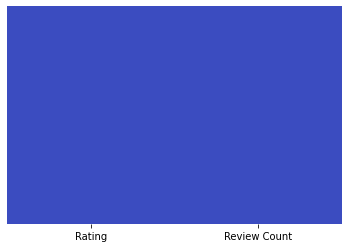

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [31]:
df.describe()

,Rating,Review Count
count,298,298
unique,28,122
top,3.9 out of 5 stars,1
freq,85,72


In [32]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

In [33]:
df_cor=df.corr()
df_cor

,Rating,Review Count
Rating,1.000000,-0.078399
Review Count,-0.078399,1.000000


In [34]:
df.skew()

Rating         -0.562396
Review Count    0.346106
dtype: float64

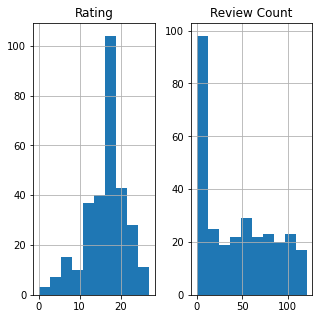

In [35]:
df.hist(figsize=(5,5))
plt.show()

In [36]:
from scipy.stats import skew
skew(df['Rating'].dropna())

-0.5595608591322282

In [37]:
from scipy import stats
p_value=stats.shapiro(df['Rating'].dropna())[1]
if p_value >= 0.05:
    print('null hyp of normality is rejected')
else:
    print('null hyp of normality is accepted')


null hyp of normality is accepted


In [38]:
x=df.iloc[:,0:-1]
x.head()

,Rating
0,11
1,17
2,16
3,19
4,12


In [39]:
y=df.iloc[:,-1]
y.head()

0     41
1      0
2     36
3    113
4     47
Name: Review Count, dtype: int32

In [40]:
x.shape

(298, 1)

In [41]:
y.shape

(298,)

In [42]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [43]:
x_train.shape

(199, 1)

In [44]:
y_train.shape

(199,)

In [45]:
x_test.shape

(99, 1)

In [46]:
y_test.shape

(99,)

In [47]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [48]:
lr.fit(x_train,y_train)

LinearRegression()

In [49]:
lr.coef_

array([-0.3708852])

In [50]:
lr.intercept_

51.20462305521502

In [51]:
lr.score(x_train,y_train)


0.0022033138222307125

In [52]:
label=lr.predict(x_test)
print('Predicted Rating:',label)
print('actual Rating',y_test)

Predicted Rating: [44.15780423 44.89957464 44.89957464 45.64134504 44.89957464 42.67426343
 45.64134504 45.64134504 44.89957464 47.49577104 44.89957464 42.67426343
 43.04514863 44.89957464 49.35019705 49.35019705 44.89957464 43.04514863
 42.67426343 46.38311544 44.89957464 46.01223024 48.23754145 43.04514863
 43.04514863 47.86665625 44.15780423 45.27045984 46.75400064 44.89957464
 47.12488584 41.19072262 45.64134504 44.89957464 45.64134504 43.41603383
 44.89957464 43.78691903 47.86665625 44.89957464 44.89957464 44.89957464
 43.41603383 46.01223024 43.78691903 43.41603383 45.64134504 48.97931185
 43.78691903 42.30337823 44.52868944 44.89957464 46.75400064 44.89957464
 44.89957464 44.89957464 43.04514863 42.67426343 44.89957464 50.09196745
 41.19072262 45.64134504 43.78691903 46.38311544 48.23754145 44.89957464
 41.93249303 44.52868944 48.60842665 48.23754145 44.89957464 48.23754145
 44.89957464 43.41603383 44.89957464 44.89957464 46.38311544 43.04514863
 44.52868944 42.67426343 44.89957

In [53]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,label))
print('Mean squared error:',mean_squared_error(y_test,label))


error:
Mean absolute error: 33.76153977014578
Mean squared error: 1415.232131507252


In [54]:
from sklearn.metrics import r2_score
print(r2_score(y_test,label))

0.0025936939371514756


In [55]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').mean()

-0.024874209149444583

In [56]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor

In [57]:
model=[LinearRegression(),DecisionTreeRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('r2_score:',r2_score(y_test,predm))
    print('***************************************************************')
    print('\n')

Score of LinearRegression() is: 0.0022033138222307125
Error:
Mean absolute error: 33.76153977014578
Mean squared error: 1415.232131507252
r2_score: 0.0025936939371514756
***************************************************************


Score of DecisionTreeRegressor() is: 0.34227600765287824
Error:
Mean absolute error: 28.773020189686857
Mean squared error: 1191.3322188433901
r2_score: 0.16039055273233538
***************************************************************




In [58]:
model=[Ridge(),ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('r2_score:',r2_score(y_test,predm))
    print('***************************************************************')
    print('\n')

Score of Ridge() is: 0.002203313729981282
Error:
Mean absolute error: 33.76160141115829
Mean squared error: 1415.2349797576826
r2_score: 0.0025916865894681784
***************************************************************


Score of ElasticNet() is: 0.002191324297111552
Error:
Mean absolute error: 33.78376203458185
Mean squared error: 1416.2769064009894
r2_score: 0.0018573729872307654
***************************************************************




In [59]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=20,random_state=59)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,predrf)) 
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('\n')
print('r2_score:',r2_score(y_test,predrf))

Score: 0.33602109747989817


Mean absolute error: 29.321106864508177
Mean squared error: 1204.8890849749257


r2_score: 0.15083614574212478


In [60]:
from sklearn.linear_model import Lasso
model=[Lasso()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('r2_score:',r2_score(y_test,predm))
    print('***************************************************************')
    print('\n')

Score of Lasso() is: 0.0021767451544758565
Error:
Mean absolute error: 33.79462028112094
Mean squared error: 1416.800496518964
r2_score: 0.00148836491157045
***************************************************************




In [61]:
from sklearn.ensemble import AdaBoostRegressor
lasso=Lasso()

adb=AdaBoostRegressor(base_estimator=lasso,n_estimators=20,learning_rate=0.1,random_state=59)
adb.fit(x_train,y_train)
print('Score:',adb.score(x_train,y_train))
predadb=adb.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,predadb)) 
print('Mean squared error:',mean_squared_error(y_test,predadb))
print('\n')
print('r2_score:',r2_score(y_test,predadb))

Score: 0.003620877938237066


Mean absolute error: 33.36640446999768
Mean squared error: 1396.9276330386801


r2_score: 0.015494066812679175


In [62]:
import joblib
joblib.dump(rf,'df.csv')

['df.csv']